# **선형회귀 모델 구축**
1. 설명 : 선형 회귀 모델을 구축해 통계적 해석
2. 예측 : 새로운 Input (X)에 대한 미래의 Output (Y) 예측 / 평가


In [4]:
conda install statsmodels

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## **모듈 불러오기**

In [5]:
%matplotlib inline 

#실습용 데이터
from sklearn.datasets import load_boston

#데이터 전처리
import pandas as pd
import numpy as np


#머신러닝 모델 구축 / 평가
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#한글 폰트
plt.style.use('seaborn')
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', unicode_minus=False)

## **Data** 
: 1978년 보스턴 주택 가격에 대한 데이터 

1. 구조
* 506 X 14
* 관측치 : 506개
* 설명 변수 (X) : 13개 
* 반응 변수 (Y) : 1개 

In [6]:
boston=load_boston()
print(boston.DESCR) #data set에 대한 설명

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [20]:
boston.target #data의 y값 확인

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [21]:
boston.feature_names #data 설명변수명(X) 확인

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [22]:
boston.data.shape #data 설명변수 shape 확인

(506, 13)

In [23]:
#data frame 형태로 변환
X=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.DataFrame(boston.target,columns=["MEDV"])

In [24]:
X.head() # X 상위 5개

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
y.head() # y 상위 5개

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2



## **train / test set 나누기**

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2021)

# **선형회귀 모델 구축**
statsmodels의 OLS를 이용해 선형회귀분석 시행
* OLS : 잔차제곱합(RSS : Residual Sum of Squares) 최소화하는 회귀 계수 구하기

### **선형회귀 모델 가정 확인**

In [29]:
X_train=sm.add_constant(X_train) #beta_0 값이 될 변수 만들기
model=sm.OLS(y_train,X_train,axis=1)
model_trained=model.fit()

#### 1. 확률 오차의 정규성 확인
빨간색 실선을 잘 따라가는 것을 보아 확률오차가 정규성을 잘 따라 가는 것을 알 수 있음

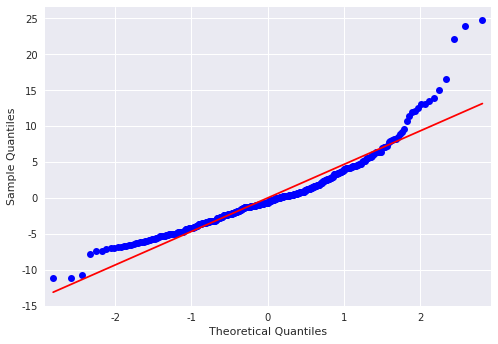

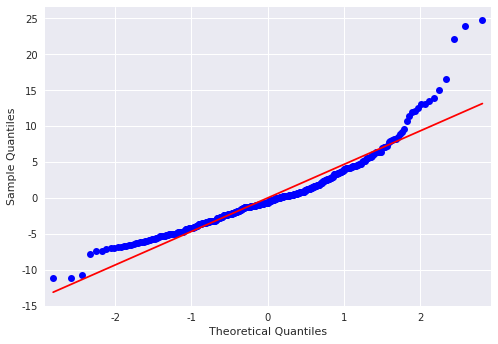

In [30]:
model_residuals=model_trained.resid

plt.rcParams["axes.unicode_minus"]=False #폰트 깨짐 방지
sm.ProbPlot(model_residuals).qqplot(line="s")

#### 2. 확률 오차의 등분산성 확인
어느정도 일직선을 따라가는 경향을 보임

/Users/yejinlee/opt/anaconda3/envs/practice_tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'residuals')

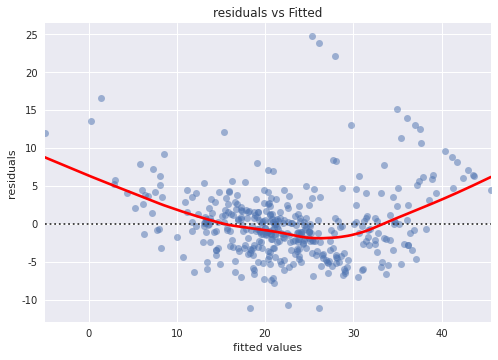

In [32]:
model_fitted_y=model_trained.fittedvalues

sns.residplot(model_fitted_y, y_train,data=X_train, lowess=True, scatter_kws={"alpha":0.5},line_kws={"color":"red"})

plt.title("residuals vs Fitted")
plt.xlabel("fitted values")
plt.ylabel("residuals")

### **설명 : 통계적인 해석**
* R-squared : 모형의 성능
* coef (회귀계수) : X가 1 단위 증가함에 따른 y의 변화량
* p-value : 0.05 (유의 수준) 이하일 때 변수 유의미

In [34]:
print(model_trained.summary()) #통계량 제공됨

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Wed, 02 Feb 2022   Prob (F-statistic):          1.02e-110
Time:                        13:59:05   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.0

상대적으로 p-value 값이 높은 변수 값 제거 : `INDUS`,`AGE` 

In [35]:
model=sm.OLS(y_train,X_train.drop(["INDUS","AGE"],axis=1))
model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 02 Feb 2022   Prob (F-statistic):          1.19e-112
Time:                        13:59:19   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.0

성능에 직접적인 개선은 없지만 다른 통계량에 대한 유의미한 해석 이루어질 수 있음

### **예측 : 미래의 반응변수 값 예측**

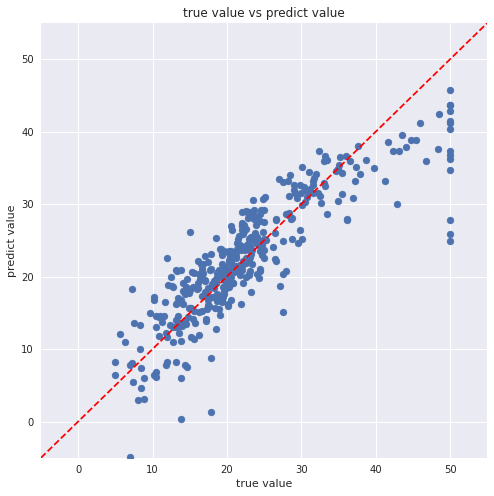

In [36]:
#train하는 부분
y_train_pred=model_trained.fittedvalues

plt.figure(figsize=(8,8))
plt.title("true value vs predict value")
plt.scatter(y_train,y_train_pred)
plt.plot([-5,55],[-5,55],ls="--",c="red")
plt.xlabel("true value")
plt.ylabel("predict value")
plt.xlim(-5,55)
plt.ylim(-5,55)
plt.show()

#일직선을 따르면 어느정도 정확한 예측을 함

test set에 대한 train 진행

In [37]:
X_test=sm.add_constant(X_test)

In [38]:
y_test_pred=model_trained.predict(X_test.drop(["INDUS","AGE"],axis=1))
y_test_pred.head()

210    22.787949
24     15.482380
36     22.346630
439    13.433993
161    36.890921
dtype: float64

모델의 성능을 평가하는 정량적인 지표들

#### **R squared (결정계수)**

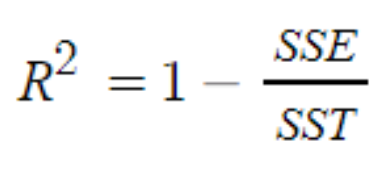

In [39]:
print(r2_score(y_test,y_test_pred))

0.638940321549958


#### **평균제곱오차**

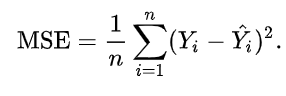

In [40]:
print(mean_squared_error(y_test,y_test_pred))

23.063158240353737


#### **제곱근 평균 제곱 오차**

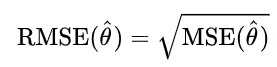

In [42]:
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

4.802411710833812


#### **평균 절대 오차**

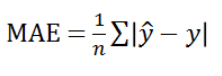

In [43]:
print(mean_absolute_error(y_test,y_test_pred))

3.512302350895111


#### **평균 절대 백분율 오차**

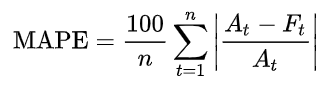

In [44]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_error(y_test,y_test_pred))

3.512302350895111


##### **결과 정리**

In [45]:
print("Training MSE : {:.3f}".format(mean_squared_error(y_train,y_train_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(y_train,y_train_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(y_train,y_train_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(y_train,y_train_pred)))
print("Training R2 : {:.3f}".format(r2_score(y_train,y_train_pred)))

Training MSE : 21.881
Training RMSE : 4.678
Training MAE : 3.315
Training MAPE : 51.174
Training R2 : 0.756


In [46]:
print("Testing MSE : {:.3f}".format(mean_squared_error(y_test,y_test_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(y_test,y_test_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(y_test,y_test_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(y_test,y_test_pred)))
print("Testing R2 : {:.3f}".format(r2_score(y_test,y_test_pred)))

Testing MSE : 23.063
Testing RMSE : 4.802
Testing MAE : 3.512
Testing MAPE : 43.946
Testing R2 : 0.639


## StatModels vs Sklearn
* statModels : 통계분석 도구
옵션이 다양하지 않지만 검증된 통계 및 계량 도구 제공
* sklearn : 데이터분석 도구
개발 속도, 많은 유저들 사용, 
회귀, 분류 등에 대한 간단하고 용이한 알고리즘 제공

In [47]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [48]:
lr_skl=LinearRegression(fit_intercept=False)
lr_skl.fit(X_train,y_train)
y_pred_skl=lr_skl.predict(X_test)

lr_stat=sm.OLS(y_train,X_train).fit()
y_pred_stat=lr_stat.predict(X_test)

In [49]:
#statModel 결과
test_mse_stat=mean_squared_error(y_test,y_pred_stat)
test_rmse_stat=np.sqrt(mean_squared_error(y_test,y_pred_stat))
test_mae_stat=mean_absolute_error(y_test,y_pred_stat)
test_mape_stat=mean_absolute_percentage_error(y_test,y_pred_stat)
test_r2_stat=r2_score(y_test,y_pred_stat)

print("Testing MSE : {:.3f}".format(test_mse_stat))
print("Testing RMSE : {:.3f}".format(test_rmse_stat))
print("Testing MAE : {:.3f}".format(test_mae_stat))
print("Testing MAPE : {:.3f}".format(test_mape_stat))
print("Testing R2 : {:.3f}".format(test_r2_stat))

Testing MSE : 23.300
Testing RMSE : 4.827
Testing MAE : 3.519
Testing MAPE : 43.914
Testing R2 : 0.635


In [50]:
#Sklearn 결과
test_mse_skl=mean_squared_error(y_test,y_pred_skl)
test_rmse_skl=np.sqrt(mean_squared_error(y_test,y_pred_skl))
test_mae_skl=mean_absolute_error(y_test,y_pred_skl)
test_mape_skl=mean_absolute_percentage_error(y_test,y_pred_skl)
test_r2_skl=r2_score(y_test,y_pred_skl)

print("Testing MSE : {:.3f}".format(test_mse_skl))
print("Testing RMSE : {:.3f}".format(test_rmse_skl))
print("Testing MAE : {:.3f}".format(test_mae_skl))
print("Testing MAPE : {:.3f}".format(test_mape_skl))
print("Testing R2 : {:.3f}".format(test_r2_skl))

Testing MSE : 23.300
Testing RMSE : 4.827
Testing MAE : 3.519
Testing MAPE : 17.366
Testing R2 : 0.635
